In [1]:
rm(list=ls())

#########################################################################
### -- ANAL?TICA PREDICTIVA DE DATOS -- ## 
#########################################################################

#########################################################################

#########################################################################

########### 1) LIBRERIAS A UTILIZAR ################# 

# Comandos necesarios para el ACP o PCA

# La funcion de R que nos permite realizar el PCA se llama princomp:

# princomp(dataset)

# Es importante que el conjunto de datos solo contenga variables 
# numericas, puesto que para el calculo de 
# las componentes necesitamos estimar una matriz de correlacion 
# o de covarianzas. 
# Si hubiera variables NO numericas en el conjunto de datos, 
# debemos excluirlas con el comando [ , ].
# La funcion princomp nos mostrara las varianzas de cada una de 
# las componentes. Sin embargo, 
# existen mas resultados que involucran al PCA y no son 
# visualizados por defecto, entre ellos las 
# cargas y los factores. Para organizar correctamente el 
# output de este analisis podemos guadar todas 
# los elementos del output en un objeto como se muestra a
# continuacion:
        
# Mi.modelo.PCA <- princomp(dataset)

# Una vez guardado los resultados en un objeto, poderemos 
# recuperar todos los outputs de manera 
# conveniente. Por ejemplo, puedes utilizar la funcion 
# summary() para visualizar las varianzas de 
# cada componente, las cargas y los factores:

# summary(Mi.modelo.PCA)

# Para visualizar solo las cargas: > Mi.modelo.PCA$loadings
# Para visualizar los scores: > Mi.modelo.PCA$scores

In [2]:
# Ejemplo I: PCA datos Economicos de Europa
Europa <- read.csv("http://www.instantr.com/wp-content/uploads/2013/01/europe.csv", header=TRUE)
head(Europa, 3)

Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment
Austria,83871,41600,3.5,79.91,0.8,0.03,4.2
Belgium,30528,37800,3.5,79.65,1.3,0.06,7.2
Bulgaria,110879,13800,4.2,73.84,2.6,-0.80,9.6


In [3]:
# Como podemos ver, este conjunto de datos tiene 1 variable 
# categorica (Country) y las restantes numericas. 
# Por ello deberiamos quitar la primera columna para poder 
# llevar adelante el analisis:

Europa2 <- Europa[,c(2,3,4,5,6)]
head(Europa2, 3)

Area,GDP,Inflation,Life.expect,Military
83871,41600,3.5,79.91,0.8
30528,37800,3.5,79.65,1.3
110879,13800,4.2,73.84,2.6


In [4]:
# A continuacion utilizamos la funcion prcomp() para obtener 
# las componentes principales:       
pca.Europa2 <- prcomp(Europa[,2:8],scale=FALSE) 
# Scale = False -> utilizamos la matriz de COVARIANZA para obtener las componentes! Veamos que ocurre:

In [5]:
# Resumen
summary(pca.Europa2)

Importance of components:
                             PC1       PC2   PC3   PC4    PC5    PC6    PC7
Standard deviation     1.656e+05 1.436e+04 4.017 2.317 0.8816 0.7474 0.2411
Proportion of Variance 9.925e-01 7.470e-03 0.000 0.000 0.0000 0.0000 0.0000
Cumulative Proportion  9.925e-01 1.000e+00 1.000 1.000 1.0000 1.0000 1.0000

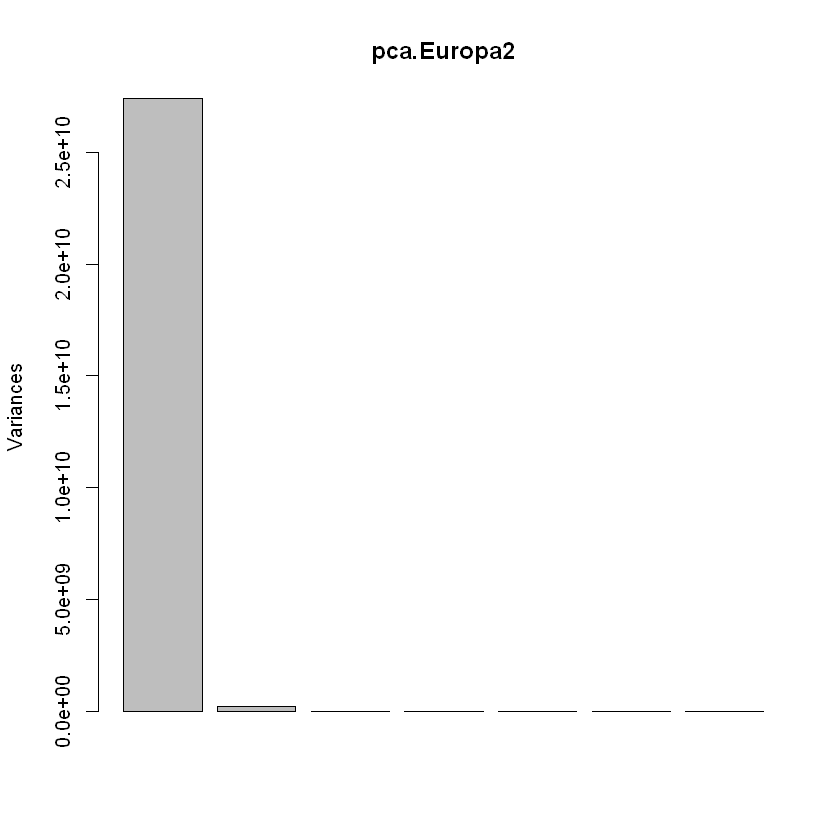

In [6]:
# Grafico de la varianza explicada
plot(pca.Europa2)

In [7]:
# La primera componente captura casi toda la variabilidad de 
# los datos! Esto quiere decir que podriamos 
# reducir las 7 variables originales a una sola variable 
# (componente principal) manteniendo (practicamente) 
# constante la cantidad de informacion disponible con 
# respecto al conjunto de datos originales.

# ?PORQUE OCURRE ESTO?
# Por ello, en vez de utilizar la matriz de covarianzas 
# para hacer PCA, se utiliza la matriz de 
# correlacion:

pca.Europa2 <- prcomp(Europa2,scale=T) 
# Scale = True -> utilizamos la matriz de CORRELACIoN para obtener las componentes! 
#Veamos que ocurre:
summary(pca.Europa2)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5
Standard deviation     1.5338 1.0241 0.9967 0.64490 0.43508
Proportion of Variance 0.4705 0.2098 0.1987 0.08318 0.03786
Cumulative Proportion  0.4705 0.6803 0.8790 0.96214 1.00000

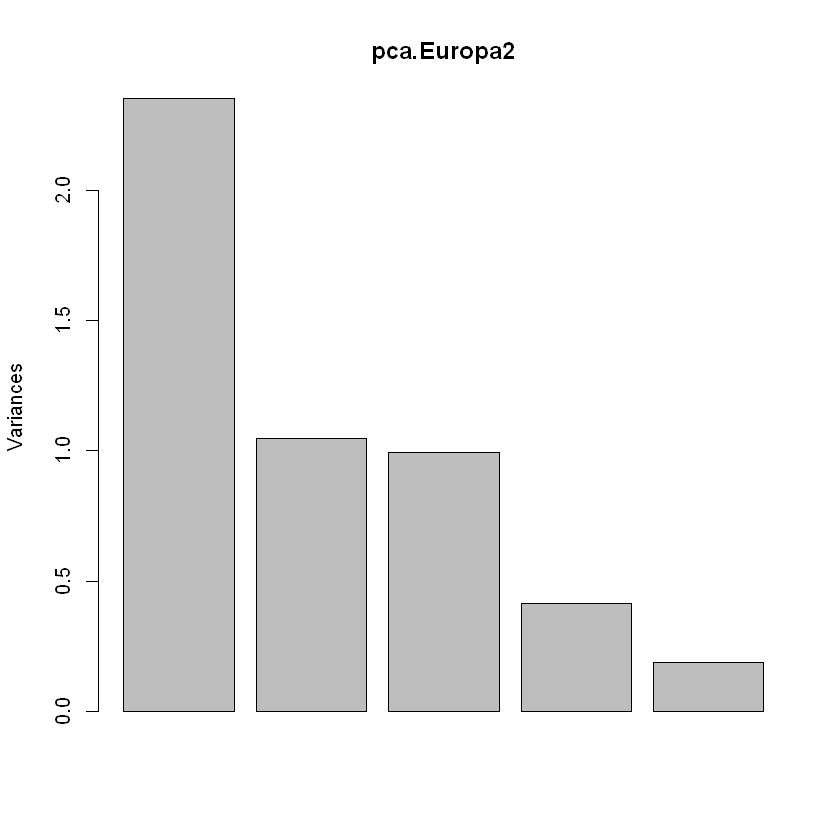

In [8]:
plot(pca.Europa2)

In [9]:
# Al homogeneizar la escala en la que hemos medido las variables, 
# la distribucion de la variabilidad entre las com ponentes 
# parece mas racional. Podemos ver mas elementos 
# del output del PCA:

pca.Europa2$sdev # Criterio de Kasiser
pca.Europa2$rotation # cargas de cada componente.

[1] 1.5338181 1.0241300 0.9966799 0.6448959 0.4350842

,PC1,PC2,PC3,PC4,PC5
Area,0.2075747,0.63474232,-0.66651136,0.24842044,-0.21923696
GDP,-0.5521591,0.01761569,-0.25547191,-0.65901870,-0.44185797
Inflation,0.5430932,-0.09061045,-0.30155296,-0.63878875,0.44480815
Life.expect,-0.5705019,0.34170664,-0.08720548,0.02388032,0.74134275
Military,0.1777933,0.68689024,0.62606528,-0.30880464,-0.09619422


In [10]:
head(pca.Europa2$x, 3) # Matriz de datos (solo primeras 3 filas) con las componentes 

PC1,PC2,PC3,PC4,PC5
-0.9118989,-0.8143000,-0.5517104,-0.31424714,0.3748562
-0.6766607,-0.6227307,0.1277470,-0.41623879,0.4408244
1.9375299,0.1026456,1.2505627,-0.06928488,-0.2182951


In [11]:
# (en columnas las nuevas variables).
pca.Europa2$sdev # Autovalores de los Componentes
pca.Europa2$rotation
pca.Europa2$x # Puntuaciones factoriales

[1] 1.5338181 1.0241300 0.9966799 0.6448959 0.4350842

,PC1,PC2,PC3,PC4,PC5
Area,0.2075747,0.63474232,-0.66651136,0.24842044,-0.21923696
GDP,-0.5521591,0.01761569,-0.25547191,-0.65901870,-0.44185797
Inflation,0.5430932,-0.09061045,-0.30155296,-0.63878875,0.44480815
Life.expect,-0.5705019,0.34170664,-0.08720548,0.02388032,0.74134275
Military,0.1777933,0.68689024,0.62606528,-0.30880464,-0.09619422


PC1,PC2,PC3,PC4,PC5
-0.9118989,-0.81430003,-0.55171041,-0.31424714,0.37485621
-0.6766607,-0.62273067,0.12774700,-0.41623879,0.44082441
1.9375299,0.10264561,1.25056273,-0.06928488,-0.21829512
0.5403744,0.07308136,1.58204781,0.62342011,-0.35379619
-0.4573051,-0.71848997,0.41155524,0.91429992,-0.31583872
-0.7466961,-0.62337510,0.26599889,-0.04774972,0.02363834
1.8280329,-0.73506811,0.76445033,-0.60393982,-0.06636282
-0.1018368,1.14187105,-0.48252983,-0.05298323,-0.11517638
-0.7193135,0.92363805,-0.83495738,0.44390901,-0.21731632
0.4047432,2.37953084,2.29792548,-0.80313165,0.32612157


In [12]:
Componentes <- pca.Europa2$x[,1:3]
Europa3 <- cbind(Europa,Componentes)

Europa3

# !! FIN

Country,Area,GDP,Inflation,Life.expect,Military,Pop.growth,Unemployment,PC1,PC2,PC3
Austria,83871,41600,3.5,79.91,0.80,0.03,4.2,-0.9118989,-0.81430003,-0.55171041
Belgium,30528,37800,3.5,79.65,1.30,0.06,7.2,-0.6766607,-0.62273067,0.12774700
Bulgaria,110879,13800,4.2,73.84,2.60,-0.80,9.6,1.9375299,0.10264561,1.25056273
Croatia,56594,18000,2.3,75.99,2.39,-0.09,17.7,0.5403744,0.07308136,1.58204781
Czech Republic,78867,27100,1.9,77.38,1.15,-0.13,8.5,-0.4573051,-0.71848997,0.41155524
Denmark,43094,37000,2.8,78.78,1.30,0.24,6.1,-0.7466961,-0.62337510,0.26599889
Estonia,45228,20400,5.0,73.58,2.00,-0.65,12.5,1.8280329,-0.73506811,0.76445033
Finland,338145,36000,3.3,79.41,2.00,0.07,7.8,-0.1018368,1.14187105,-0.48252983
Germany,357022,38100,2.5,80.19,1.50,-0.20,6.0,-0.7193135,0.92363805,-0.83495738
Greece,131957,26300,3.3,80.05,4.30,0.06,17.4,0.4047432,2.37953084,2.29792548
